# EDA — Experiencia y Modalidad de Trabajo

Resumen de `YearsCodePro_num` y distribución de `RemoteWork`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:,.2f}".format)

df = pd.read_csv("../data/processed/df_final_v1.csv")
df = df.copy()  # avoid SettingWithCopy warnings
df.head()

,ResponseId,MainBranch,Employment,Country,RemoteWork,ConvertedCompYearly,YearsCodePro,YearsCode,DevType,EdLevel,...,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith,has_salary,log_salary,YearsCodePro_clean,YearsCodePro_num
0,1,I am a developer by profession,"Employed, full-time",United States of America,Remote,NaN,NaN,NaN,NaN,Primary/elementary school,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,17,20,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Express;Next.js;Node.js;React,Amazon Web Services (AWS);Heroku;Netlify,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,False,NaN,17.00,17.00
2,3,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,27,37,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,NaN,C#,Firebase Realtime Database,ASP.NET CORE,Google Cloud,MSBuild,False,NaN,27.00,27.00
3,4,I am learning to code,"Student, full-time",Canada,NaN,NaN,NaN,4,"Developer, full-stack",Some college/university study without earning ...,...,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,jQuery;Next.js;Node.js;React;WordPress,Amazon Web Services (AWS);Fly.io;Heroku,Docker;npm;Pip,False,NaN,NaN,NaN
4,5,I am a developer by profession,"Student, full-time",Norway,NaN,NaN,NaN,9,"Developer, full-stack","Secondary school (e.g. American high school, G...",...,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,APT;Make;npm,False,NaN,NaN,NaN


## Percentiles de experiencia (YearsCodePro_num)

Calculamos p25, mediana, p75 y máximo para los años de experiencia profesional.

In [2]:
s = df["YearsCodePro_num"].dropna()
p25 = s.quantile(0.25)
p50 = s.median()
p75 = s.quantile(0.75)
pmax = s.max()

print("Resumen experiencia (YearsCodePro_num):")
print(f"p25: {p25:,.0f} anos")
print(f"p50 (mediana): {p50:,.0f} anos")
print(f"p75: {p75:,.0f} anos")
print(f"max: {pmax:,.0f} anos")

Resumen experiencia (YearsCodePro_num):
p25: 3 anos
p50 (mediana): 7 anos
p75: 15 anos
max: 50 anos


## Histograma / ECDF de YearsCodePro_num

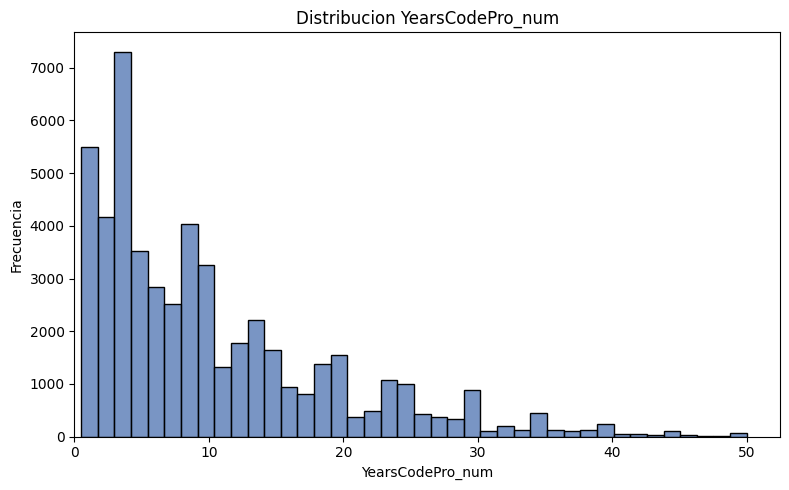

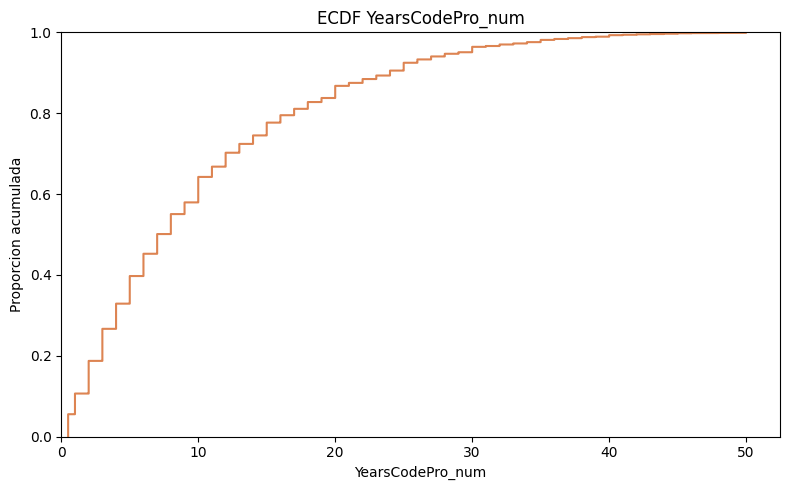

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(s, bins=40, color="#4c72b0")
plt.title("Distribucion YearsCodePro_num")
plt.xlabel("YearsCodePro_num")
plt.ylabel("Frecuencia")
plt.xlim(left=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.ecdfplot(s, color="#dd8452")
plt.title("ECDF YearsCodePro_num")
plt.xlabel("YearsCodePro_num")
plt.ylabel("Proporcion acumulada")
plt.xlim(left=0)
plt.tight_layout()
plt.show()

## Frecuencias de RemoteWork

In [4]:
remote_counts = df["RemoteWork"].fillna("Missing").value_counts()
remote_share = remote_counts / remote_counts.sum()
display(pd.DataFrame({"n": remote_counts, "pct": (remote_share * 100).round(1)}))

,n,pct
RemoteWork,,
"Hybrid (some remote, some in-person)",23015,35.20
Remote,20831,31.80
In-person,10960,16.70
Missing,10631,16.20


## Barplot RemoteWork (frecuencias)

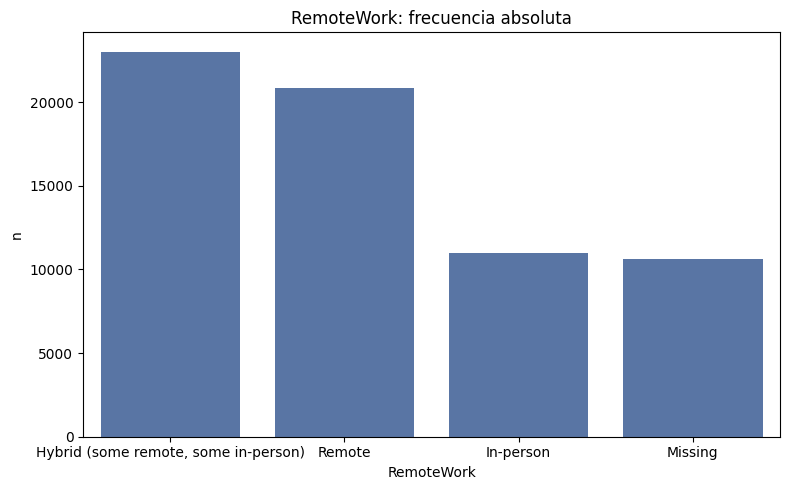

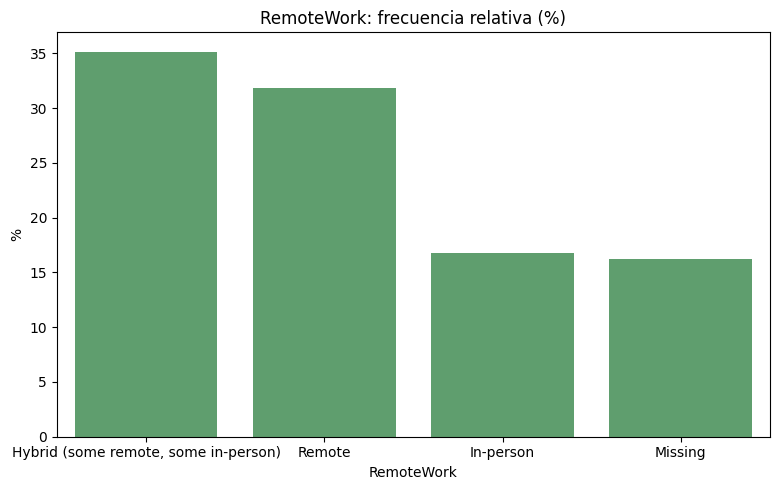

In [ ]:
plot_df = remote_counts.reset_index()
plot_df.columns = ["RemoteWork", "n"]
plot_df["pct"] = remote_share.loc[plot_df["RemoteWork"]].values * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="RemoteWork", y="n", color="#4c72b0")
plt.title("RemoteWork: frecuencia absoluta")
plt.xlabel("RemoteWork")
plt.ylabel("n")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x="RemoteWork", y="pct", color="#55a868")
plt.title("RemoteWork: frecuencia relativa (%)")
plt.xlabel("RemoteWork")
plt.ylabel("%")
plt.tight_layout()
plt.show()

## Resumen por modalidad (log_salary)

Estadísticos de `log_salary` por `RemoteWork`: n, media, mediana y desviación estándar.

In [ ]:
agg = (
    df.groupby("RemoteWork")["log_salary"]
    .agg(n="count", mean="mean", median="median", sd="std")
    .round({"mean": 3, "median": 3, "sd": 3})
    .sort_values(by="n", ascending=False)
)
display(agg)


,n,mean,median,sd
RemoteWork,,,,
"Hybrid (some remote, some in-person)",9899,10.88,11.11,1.20
Remote,9591,10.86,11.22,1.51
In-person,3937,10.35,10.71,1.51


## Boxplot / Violin de log_salary por RemoteWork

Estos gráficos comparan la distribución de `log_salary` entre modalidades. El **boxplot** resume mediana e IQR (caja), y outliers (puntos). El **violin** muestra la densidad de la distribución.

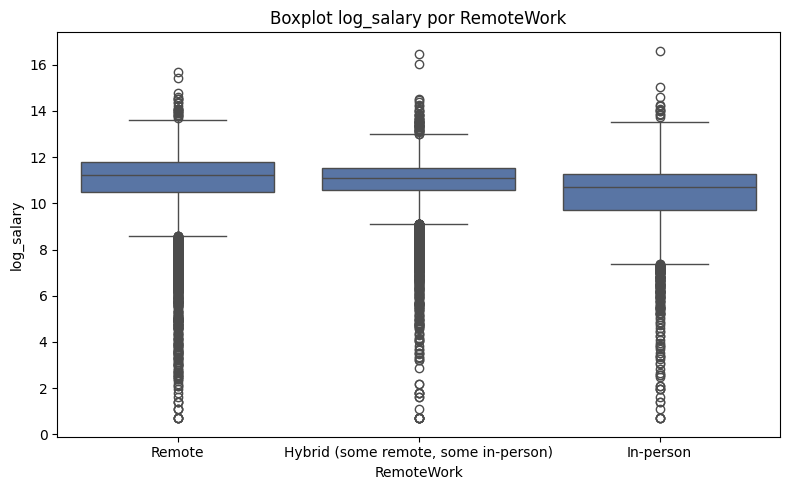

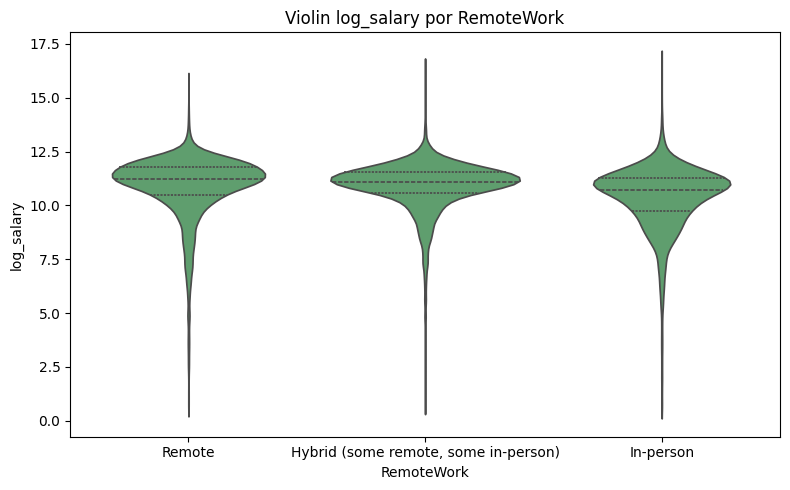

In [7]:
order = ["Remote", "Hybrid (some remote, some in-person)", "In-person"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="RemoteWork", y="log_salary", order=order, color="#4c72b0")
plt.title("Boxplot log_salary por RemoteWork")
plt.xlabel("RemoteWork")
plt.ylabel("log_salary")
plt.tight_layout()
plt.savefig("boxplot_logsalary_remotework.png", dpi=150, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="RemoteWork", y="log_salary", order=order, inner="quartile", color="#55a868")
plt.title("Violin log_salary por RemoteWork")
plt.xlabel("RemoteWork")
plt.ylabel("log_salary")
plt.tight_layout()
plt.savefig("violin_logsalary_remotework.png", dpi=150, bbox_inches="tight")
plt.show()
